# Linear Regression  : Gradient Descent Implementation from Scratch for One Feature

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
X_train, Y_train, X_test, Y_test =train_test_split(points[:,0],points[:,1],test_size=0.6)

In [38]:
def step_gradient(points, learning_rate, b_current, m_current):
    m_slope = 0
    b_slope = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        b_slope += -(2/N) * (y - m_current* x - b_current)
        m_slope += -(2/N) * (y - m_current* x - b_current)*x
    new_m = m_current - learning_rate * m_slope
    new_b = b_current - learning_rate* b_slope
    return (new_b, new_m)

def cost_gd(b, m , points):
    total_cost = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i, 1]
        total_cost += (y - (m*x + b))**2
        
    return total_cost/len(points)

def gd_runner(points, learning_rate = 0.001, num_iterations = 1000):
    b = 0
    m = 0
    xs = points[:, 0]
    ys = points[:, 1]
    cost=np.zeros(num_iterations)
    itr=np.zeros(num_iterations)
    print ("Start Cost: ", cost_gd(b, m , points))
    for i in range(num_iterations):
        b, m = step_gradient(points, learning_rate, b, m)
        itr[i]=i
        cost[i]= cost_gd(b,m,points)
#         if(i==0):
#             x_p=xs[i]
#             y_p = m* x_p+b
            
#         if(i%10==0):
#             x_n=xs[94]
#             y_n= m*x_n+b
#             x=[x_p,x_n]
#             y=[y_p,y_n]
#             plt.plot(x,y)
#             print("m :",m," b:",b)
#             plt.scatter(xs,ys)
#             plt.show()
         
   # print(xs)
   # print(ys)
    
    
    print("Final Cost: ", cost_gd(b, m , points))
    plt.plot(itr,cost)
    print("Learning Rate:",learning_rate)
    plt.show()
    return (b, m)

def run():
    points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
    learning_rate = 0.01
    num_iterations = 100
    while(learning_rate>=0.00001):
        final_b, final_m = gd_runner(points, learning_rate, num_iterations)
        learning_rate =learning_rate*0.5
    print("Final-Intercept :",final_b,"Final-Slope :", final_m)
    return final_b, final_m

# Effect of Learning Rate on Cost 

Start Cost:  5565.107834483211


C:\Users\Divanshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


Final Cost:  inf
Learning Rate: 0.01


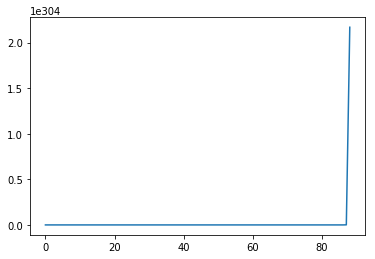

Start Cost:  5565.107834483211
Final Cost:  3.062298996909755e+279
Learning Rate: 0.005


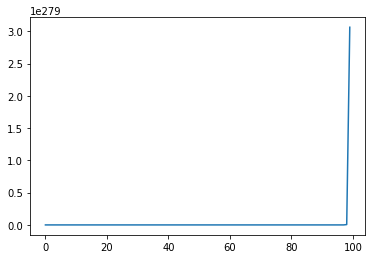

Start Cost:  5565.107834483211
Final Cost:  3.7206153478871774e+215
Learning Rate: 0.0025


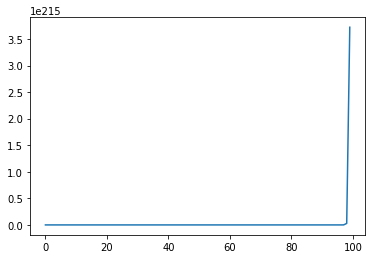

Start Cost:  5565.107834483211
Final Cost:  2.71488646021611e+147
Learning Rate: 0.00125


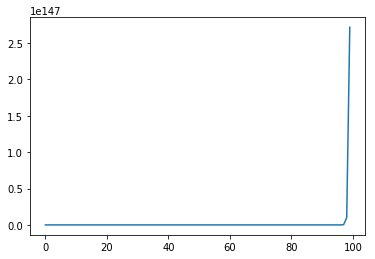

Start Cost:  5565.107834483211
Final Cost:  6.2335699452858385e+68
Learning Rate: 0.000625


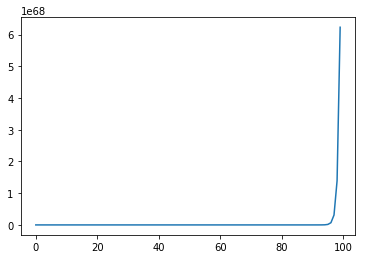

Start Cost:  5565.107834483211
Final Cost:  112.6394032338809
Learning Rate: 0.0003125


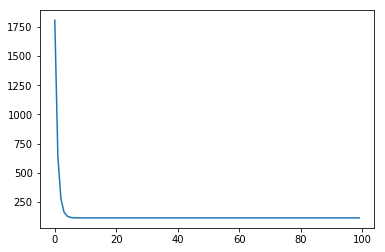

Start Cost:  5565.107834483211
Final Cost:  112.64502836260384
Learning Rate: 0.00015625


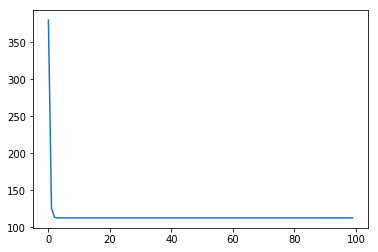

Start Cost:  5565.107834483211
Final Cost:  112.64784588146365
Learning Rate: 7.8125e-05


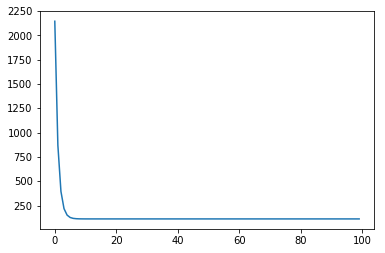

Start Cost:  5565.107834483211
Final Cost:  112.64925588120629
Learning Rate: 3.90625e-05


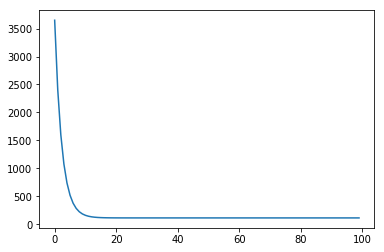

Start Cost:  5565.107834483211
Final Cost:  112.64996813135473
Learning Rate: 1.953125e-05


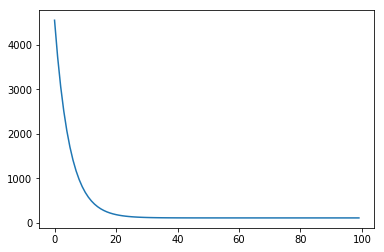

Final-Intercept : 0.0302403409235568 Final-Slope : 1.4788449574844786


In [39]:
b,m=run()

In [40]:
points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
points

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

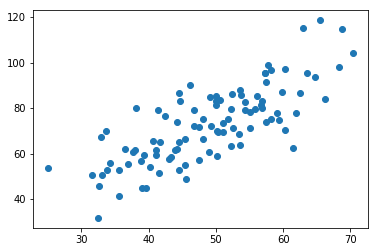

In [41]:
X=points[:,0]
Y=points[:,1]
plt.scatter(X,Y)
plt.show()

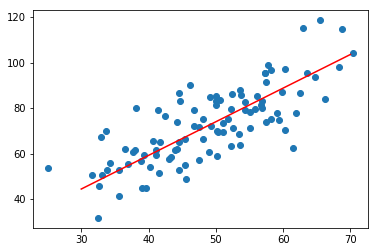

In [50]:
x1= 30
x2= 70
y1 = m * x1 + b
y2 = m * x2 + b
X_pt=[[x1],[x2]]
Y_pt=[[y1],[y2]]
plt.scatter(X,Y)
plt.plot(X_pt,Y_pt,'r-')
plt.show()

# Using In-Built Linear Regression()

In [81]:
from sklearn.linear_model import LinearRegression
X.shape

(100,)

In [87]:
xs = X.reshape((100,1))
ys= Y
Y

array([ 31.70700585,  68.77759598,  62.5623823 ,  71.54663223,
        87.23092513,  78.21151827,  79.64197305,  59.17148932,
        75.3312423 ,  71.30087989,  55.16567715,  82.47884676,
        62.00892325,  75.39287043,  81.43619216,  60.72360244,
        82.89250373,  97.37989686,  48.84715332,  56.87721319,
        83.87856466, 118.5912173 ,  57.25181946,  51.39174408,
        75.38065167,  74.76556403,  95.45505292,  95.22936602,
        79.05240617,  83.43207142,  63.35879032,  41.4128853 ,
        76.61734128,  96.76956643,  74.08413012,  66.58814441,
        77.76848242,  50.71958891,  62.12457082,  60.81024665,
        52.68298337,  58.56982472,  82.90598149,  61.4247098 ,
       115.2441528 ,  45.57058882,  54.0840548 ,  87.99445276,
        52.72549438,  93.57611869,  80.16627545,  65.10171157,
        65.56230126,  65.28088692,  73.43464155,  71.13972786,
        79.10282968,  86.52053844,  84.74269781,  59.35885025,
        61.68403752,  69.84760416,  86.09829121,  59.10

In [99]:
clf=LinearRegression()
clf.fit(xs,ys)
m1=clf.coef_[0]
m1

1.3224310227553597

In [101]:
b1=clf.intercept_
b1

7.991020982270399

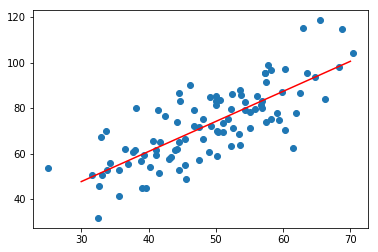

In [103]:
x1= 30
x2= 70
y1 = x1 * m1 + b1
y2 = x2 * m1  + b1
X1_pt=[[x1],[x2]]
Y1_pt=[[y1],[y2]]
plt.scatter(X,Y)
plt.plot(X1_pt,Y1_pt,'r-')
plt.show()